In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [17]:
df=pd.read_csv('df_grade.csv')
df.head()

,price,is_cust_build,grade,view,waterfront,bedrooms,bathrooms,floors,sqft_living15,sqft_above,has_basement,years_since_renovated,condition
0,221900.0,0,7,0.0,0.0,3,1.00,1.0,1340,1180,0,0.0,3
1,538000.0,0,7,0.0,0.0,3,2.25,2.0,1690,2170,1,29.0,3
2,180000.0,0,6,0.0,0.0,2,1.00,1.0,2720,770,0,0.0,3
3,604000.0,0,7,0.0,0.0,4,3.00,1.0,1360,1050,1,0.0,5
4,510000.0,0,8,0.0,0.0,3,2.00,1.0,1800,1680,0,0.0,3


# VIF Scores

In [44]:
outcome = 'price'
x_cols = ['grade', 'view', 'waterfront','bedrooms', 'bathrooms', 'condition', 
          'years_since_renovated', 'has_basement', 'floors', 'sqft_living15']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     2402.
Date:                Tue, 02 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:53:27   Log-Likelihood:            -2.8104e+05
No. Observations:               20738   AIC:                         5.621e+05
Df Residuals:                   20728   BIC:                         5.622e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -1.82e+06   3.79e+04    -48.014      0.000   -1.89e+06   -1.75e+06
grade                  1.253e+05   1962.893     63.809      0.000    1.21e+05    1.29e+05
view                   5.389e+04   2019.714     26.682      0.000    4.99e+04    5.78e+04
waterfront             2.583e+05   2.08e+04     12.431      0.000    2.18e+05    2.99e+05
bathrooms              1.354e+04   2606.573      5.194      0.000    8428.500    1.86e+04
condition              5.819e+04   2081.099     27.959      0.000    5.41e+04    6.23e+04
years_since_renovated  3465.9748    247.811     13.986      0.000    2980.245    3951.704
has_basement           7.002e+04   2961.929     23.641      0.000    6.42e+04    7.58e+04
floors                  2.55e+04   3170.678      8.044      0.000    1.93e+04    3.17e+04
sqft_living15          1.422e+05   5757.429     24.700      0.000    1.31e+05    1.53e+05
==============================================================================
Omnibus:                     5524.595   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21719.788
Skew:                           1.281   Prob(JB):                         0.00
Kurtosis:                       7.310   Cond. No.                         345.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('grade', 71.38595144850393),
 ('view', 1.3220756070176831),
 ('waterfront', 1.1368999879489479),
 ('bedrooms', 20.75467558629587),
 ('bathrooms', 23.81305183764461),
 ('condition', 22.289996564629337),
 ('years_since_renovated', 1.0353534853763626),
 ('has_basement', 2.6317106973299804),
 ('sqft_above', 25.43962982866731),
 ('floors', 15.177443834320664),
 ('sqft_living15', 27.227038386244903)]

## Transform sqft_living15

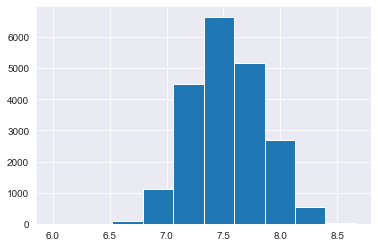

In [39]:
log_sqft_living15 = np.log(df['sqft_living15'])
plt.hist(log_sqft_living15)
plt.show()

In [41]:
df['sqft_living15'] = log_sqft_living15
df.head()

,price,is_cust_build,grade,view,waterfront,bedrooms,bathrooms,floors,sqft_living15,sqft_above,has_basement,years_since_renovated,condition
0,221900.0,0,7,0.0,0.0,3,1.00,1.0,7.200425,1180,0,0.0,3
1,538000.0,0,7,0.0,0.0,3,2.25,2.0,7.432484,2170,1,29.0,3
2,180000.0,0,6,0.0,0.0,2,1.00,1.0,7.908387,770,0,0.0,3
3,604000.0,0,7,0.0,0.0,4,3.00,1.0,7.215240,1050,1,0.0,5
4,510000.0,0,8,0.0,0.0,3,2.00,1.0,7.495542,1680,0,0.0,3


In [45]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     2402.
Date:                Tue, 02 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:53:34   Log-Likelihood:            -2.8104e+05
No. Observations:               20738   AIC:                         5.621e+05
Df Residuals:                   20728   BIC:                         5.622e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -1.82e+06   3.79e+04    -48.014      0.000   -1.89e+06   -1.75e+06
grade                  1.253e+05   1962.893     63.809      0.000    1.21e+05    1.29e+05
view                   5.389e+04   2019.714     26.682      0.000    4.99e+04    5.78e+04
waterfront             2.583e+05   2.08e+04     12.431      0.000    2.18e+05    2.99e+05
bathrooms              1.354e+04   2606.573      5.194      0.000    8428.500    1.86e+04
condition              5.819e+04   2081.099     27.959      0.000    5.41e+04    6.23e+04
years_since_renovated  3465.9748    247.811     13.986      0.000    2980.245    3951.704
has_basement           7.002e+04   2961.929     23.641      0.000    6.42e+04    7.58e+04
floors                  2.55e+04   3170.678      8.044      0.000    1.93e+04    3.17e+04
sqft_living15          1.422e+05   5757.429     24.700      0.000    1.31e+05    1.53e+05
==============================================================================
Omnibus:                     5524.595   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21719.788
Skew:                           1.281   Prob(JB):                         0.00
Kurtosis:                       7.310   Cond. No.                         345.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Training

In [18]:
outcome = 'price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [19]:
train, test = train_test_split(df)

In [20]:
print(len(train), len(test))
train.head()

15553 5185


,price,is_cust_build,grade,view,waterfront,bedrooms,bathrooms,floors,sqft_living15,sqft_above,has_basement,years_since_renovated,condition
2496,733000.0,0,9,0.0,0.0,3,2.5,2.0,3060,2160,0,0.0,4
81,940000.0,0,9,0.0,0.0,3,1.5,2.0,2020,1900,1,0.0,3
10574,436500.0,0,8,0.0,0.0,5,3.0,1.0,3050,1790,1,0.0,3
3016,215000.0,0,7,0.0,0.0,3,1.5,1.0,1440,780,1,0.0,4
3819,202000.0,0,7,0.0,0.0,1,1.0,1.0,780,590,0,0.0,4


In [21]:
test.head()

,price,is_cust_build,grade,view,waterfront,bedrooms,bathrooms,floors,sqft_living15,sqft_above,has_basement,years_since_renovated,condition
12787,739888.0,0,8,4.0,0.0,3,2.5,2.0,3740,1690,1,0.0,4
10393,299000.0,0,8,0.0,0.0,3,2.5,2.0,2000,1650,0,0.0,3
1790,616300.0,0,7,2.0,0.0,3,2.0,2.0,1820,1700,0,0.0,3
13643,474500.0,0,6,0.0,0.0,5,2.5,1.0,1410,1150,1,0.0,3
2560,558000.0,0,8,0.0,0.0,3,2.5,3.0,1740,1680,0,0.0,3


In [22]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     1627.
Date:                Tue, 02 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:57:39   Log-Likelihood:            -2.1043e+05
No. Observations:               15553   AIC:                         4.209e+05
Df Residuals:                   15541   BIC:                         4.210e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -7.604e+05   1.69e+04    -44.891      0.000   -7.94e+05   -7.27e+05
is_cust_build            1.4e-07   3.15e-09     44.424      0.000    1.34e-07    1.46e-07
grade                  9.958e+04   2388.560     41.691      0.000    9.49e+04    1.04e+05
view                   5.248e+04   2297.459     22.844      0.000     4.8e+04     5.7e+04
waterfront             2.986e+05   2.29e+04     13.012      0.000    2.54e+05    3.44e+05
bedrooms              -2137.2637   1970.120     -1.085      0.278   -5998.929    1724.401
bathrooms             -1.452e+04   3240.180     -4.482      0.000   -2.09e+04   -8169.830
floors                 1.923e+04   3648.975      5.271      0.000    1.21e+04    2.64e+04
sqft_living15            50.7583      3.738     13.579      0.000      43.431      58.085
sqft_above               90.7679      4.139     21.929      0.000      82.655      98.881
has_basement           1.152e+05   3824.326     30.128      0.000    1.08e+05    1.23e+05
years_since_renovated  3400.6365    280.921     12.105      0.000    2849.999    3951.274
condition              5.984e+04   2354.739     25.413      0.000    5.52e+04    6.45e+04
==============================================================================
Omnibus:                     3861.427   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14571.912
Skew:                           1.203   Prob(JB):                         0.00
Kurtosis:                       7.086   Cond. No.                     4.77e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.18e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [23]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

13 11
['is_cust_build', 'grade', 'view', 'waterfront', 'bathrooms']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-7.604e+05,1.69e+04,-44.891,0.0,-7.94e+05,-7.27e+05
is_cust_build,1.4e-07,3.15e-09,44.424,0.0,1.34e-07,1.46e-07
grade,9.958e+04,2388.560,41.691,0.0,9.49e+04,1.04e+05
view,5.248e+04,2297.459,22.844,0.0,4.8e+04,5.7e+04
waterfront,2.986e+05,2.29e+04,13.012,0.0,2.54e+05,3.44e+05
